# Non-parametric statistical tests

## Parametric vs. non-parametric statistical tests

### Parametric test
- Based on parameters that summarize a distribution, such as mean and standard deviation
- For example, t-tests and ANOVA assume a normal distribution of samples

### Non-parametric test
- Advantage: No assumptions about parent population (more robust)
- Disadvantage: Less power in situations where parametric assumptions are satisfied (more samples needed to draw conclusions at same confidence level)

## Testing for normality

The following figures come from a notebook on the central limit theorem and testing for normality of a distribution:

https://github.com/tompc35/oceanography-notebooks/blob/master/central_limit_theorem.ipynb

![images/norm_dist_week3.png](images/norm_dist_week3.png)

Blue: Sample distribution ($O_i$)<br>
Red: Normal distribution with same mean and standard deviation, expected value ($E_i$)

### Chi squared test for normality

$$ X^2 = \sum_{i=1}^k \frac{\left(O_i - E_i\right)^2}{E_i}$$

Tests for goodness of fit

Compare this test statistic to the Chi-Squared distribution $\chi_{\nu, 1-\alpha}^2$, where $\nu = k-1$ is the degrees of freedom.

- If test statistic is larger than the Chi-square value, can reject the Null Hypothesis that they are from the same distribution. Note that this test is sensitive to bin size.

### Probability Plot

![images/prob_dens.png](images/prob_dens.png)

The corresponding probability plot for this distribution is shown below:

![images/prob_plot.png](images/prob_plot.png)

The x-axis is the _quantiles_ of the normal. If a normal distribution is split up into some discrete number of pieces, the quantiles are the z-scores at the edges of each piece. The quantiles are tightly clustered near zero.

The y-axis is the _ordered values_ in the sample distribution.

If values are normally distributed, the quantiles should plot linearly with the ordered values. That is, most values are clustered around the mean. Note that this test is qualitative and the $R^2$ statistic does not have much meaning in this case. As we will see later, correlation statistics are only meaningful of the variables are normally distributed.

###### Example for a non-normal distribution:

![images/non_norm_dist.png](images/non_norm_dist.png)
![images/non_norm_prob_plot.png](images/non_norm_prob_plot.png)



### Kolmogorov-Smirnov test

Can be used to compare two sample distributions, or a sample distribution and a reference distribution (normal, exponential, etc.)

Null Hypothesis: Samples are drawn from the same distribution (in the two-sample case)

#### An oceanographic example

![images/km_dist.png](images/km_dist.png)

_Source_: Durkin et al (2009), Chitin in diatoms and its association with the cell wall, Eukaryotic Cell

The following graph illustrates the K-S test statistic for a two-sample test.

![images/KS_wiki.png](images/KS_wiki.png)

Source: https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test <br>

Illustration of the two-sample Kolmogorov–Smirnov statistic. Red and blue lines each correspond to an empirical distribution function, and the black arrow is the two-sample KS statistic.

This is a very sensitive test, therefore with lots of samples it is very easy to reject the null hypothesis. i.e. low power

```python
from scipy import stats

help(stats.kstest)
```

#### Other tests for normality

##### Shapiro-Wilk
- High Power
- Biased at __Large__ sample size

```python
from scipy import stats

help(stats.shapiro)
```

##### Anderson-Darling

```python
from scipy import stats
help(stats.anderson)
```

These tests, along with the K-S test and probability plots are included in the Python stats library.

### Geometric mean

If you were to log-transform data and then do a T-test, you'd be testing for a differences between geometric means.


Will amplify the large values


### Non-parametric tests: univariate data

#### Wilcoxan signed-rank test

__$H_0$__: the median difference between pairs of observations is zero

- Rank the absolute values of the differences (smallest = 1)
- Sum the ranks of the positive values, and sum the ranks the negative values separately
- The smaller of the two sums is the test statistic T
- Low values of T required for significance
- Use __Mann-Whitney__ test for unpaired data

```python
from scipy import stats

stats.wilcoxon
```

#### Mann- Whitney test
- ranked test
- analaogue of t-test for independent samples

```python
from scipy import stats

stats.mannwhitneyu
```

#### Kruskal-Wallis ANOVA

__$H_0$__: Means of ranks of groups are the same <br>
__$H_0 (II)$__: Medians of groups are the same (assuming they come from distributions with the same shape)

- Related to the Mann-Whitney rank-sum test (two groups)
- Does not assume normality, but...
- According to [McDonald](http://www.biostathandbook.com), the Fisher's classic ANOVA is not actually very sensitive to non-normal distributions
- Like Fisher's classic ANOVA, testing $H_0 (II)$ does not assume difference groups have same variance( homoscedasticity)
- Welch's ANOVA is another alternative to Fisher's ANOVA that does not assume homoscedasticity (like Welch's t-test)

```python
from scipy import stats

stats.kruskal
```

https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

#### Spearman's correlation coefficient, $\rho$

Non-parametric test for rank-ordered correlation.

- Test for a relationship between the rank-ordered data (lowest variable in x corresponds to lowest variable in y, highest variable in x corresponds to highest variable in y, etc.)

- $\rho$ = 1 if  y increases __monotonically__ with x

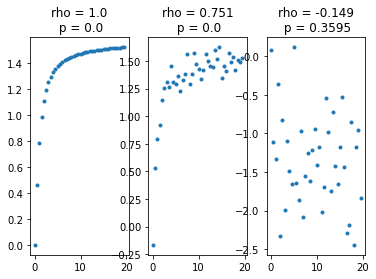

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(0,20,0.5)
y1 = np.arctan(x)
y2 = np.arctan(x)+np.random.normal(0,0.1,len(x))
y3 = -np.arctan(x)+np.random.normal(0,0.6,len(x))

rho1,p1 = stats.spearmanr(x,y1)
rho2,p2 = stats.spearmanr(x,y2)
rho3,p3 = stats.spearmanr(x,y3)

plt.figure()
plt.subplot(1,3,1)
plt.plot(x,y1,'.')
plt.title('rho = '+str(round(rho1,3))+'\n p = '+str(round(p1,3)))

plt.subplot(1,3,2)
plt.plot(x,y2,'.')
plt.title('rho = '+str(round(rho2,3))+'\n p = '+str(round(p2,4)))

plt.subplot(1,3,3)
plt.plot(x,y3,'.')
plt.title('rho = '+str(round(rho3,3))+'\n p = '+str(round(p3,4)));

Spearman's correlation coefficient is not useful for relationships like those below because they are not monotonic relationships.

![images/bad_rank.png](images/bad_rank.png)

[source: jpktd.blogspot.com](http://jpktd.blogspot.com/2012/06/non-linear-dependence-measures-distance.html)

## A guide to common statistical tests

![images/test_cases.png](images/test_cases.png)


Make sure that if you are using a non-parametric test, that you know what the hypothesis is. For example, Mann-Whitney and Kruskal-Wallis test for differences between _medians_, not means. If performing a t-test on log transformed data, the null hypothesis is no difference between _geometric means_ (G.M.)

$$GM = \sqrt[n]{x_i \times x_2 \cdots x_n}$$

